In [1]:
import gym
import os
from stable_baselines.results_plotter import load_results
from seagul.plot import smooth_bounded_curve
import matplotlib.pyplot as plt
import numpy as np
import torch
import pybullet_envs
from stable_baselines import TD3 as ALGO
import time

env_name = "Walker2d-v2"

def do_rollout_stable(init_point=None, render=False):
    env = gym.make(env_name)
    model.observation_space = env.observation_space
    #td3_model = TD3.load(script_path + "../rl-baselines-zoo/baseline_log2/td3/su_acrobot_cdc-v0_2/su_acrobot_cdc-v0.zip")

    if init_point is not None:
        obs = env.reset(init_point)
    else:
        obs = env.reset()

    obs = torch.as_tensor(obs, dtype=torch.float32)

    acts_list = []
    obs1_list = []
    rews_list = []

    dtype = torch.float32
    act_size = env.action_space.shape[0]
    obs_size = env.observation_space.shape[0]

    done = False
    cur_step = 0

#    import ipdb; ipdb.set_trace()

    while not done:
        acts = model.predict(obs)[0]


        obs, rew, done, out = env.step(acts)

        if render:
            env.render()
            time.sleep(.002)
        obs1_list.append(obs)
        obs = torch.as_tensor(obs, dtype=dtype)

        acts_list.append(torch.as_tensor(acts))
        rews_list.append(torch.as_tensor(rew, dtype=dtype))
        cur_step += 1

    ep_obs1 = torch.tensor(obs1_list)
    ep_acts = torch.stack(acts_list)
    ep_rews = torch.stack(rews_list)

    return ep_obs1, ep_acts, ep_rews

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



Loading a model without an environment, this model cannot be trained until it has a valid environment.




Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.Dense instead.





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a v

<Figure size 432x288 with 0 Axes>

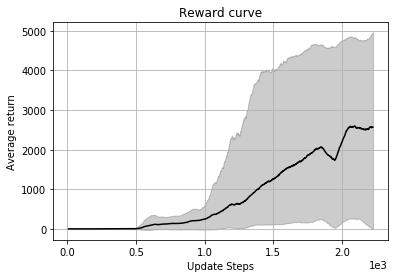

<Figure size 432x288 with 0 Axes>

In [2]:
# %%
fig, ax = plt.subplots(1,1)

#log_dir = script_path + './walker_log'
df_list = []
model_list = []
min_length = float('inf')

trial_path = "/home/sgillen/work/lorenz/run_stable/data/mj15/td30/"
#trial_path = "/home/sgillen/work/lorenz/run_stable/data/bf/0"
for entry in os.scandir(trial_path):
    if ".ipynb" in entry.path:
        continue
    
    df = load_results(entry.path)


    if len(df['r']) < min_length:
        min_length = len(df['r'])

    df_list.append(df)
    model_list.append(ALGO.load(entry.path + "/model.zip"))

min_length = int(min_length)
rewards = np.zeros((min_length, len(df_list)))

for i, df in enumerate(df_list):
    rewards[:, i] = np.array(df['r'][:min_length])

smooth_bounded_curve(rewards[:min_length], ax=ax)
 
ax.grid()
ax.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
#fig.savefig(script_path + '../figs/reward.png')
plt.figure() 

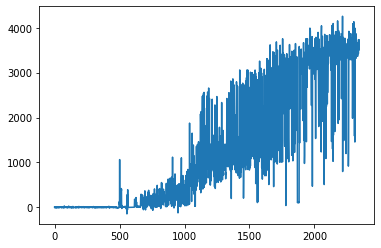

/home/sgillen/miniconda3/envs/stable/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Creating window glfw
reward sum: 3467.777587890625


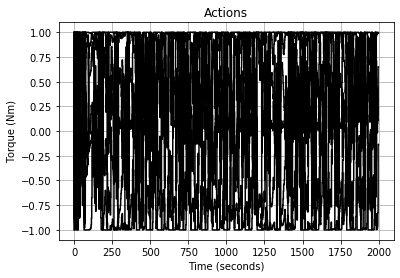

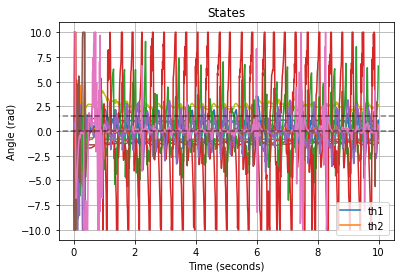

In [3]:
model = model_list[3]
df = df_list[3]
plt.plot(df['r']); plt.show()

obs_hist, act_hist, rew_hist = do_rollout_stable(render=True)

print(f"reward sum: {sum(rew_hist)}")

t = np.array([i*2 for i in range(act_hist.shape[0])])
plt.step(t, act_hist, 'k')
plt.title('Actions')
plt.xlabel('Time (seconds)')
plt.ylabel('Torque (Nm)')
plt.grid()
#plt.savefig(script_path + '../figs/act_hist.png')
plt.show(); plt.figure()

t = np.array([i*.01 for i in range(obs_hist.shape[0])])
plt.plot(t, obs_hist)

plt.axhline(np.pi/2, -1, 11,color='k',  linestyle='dashed', alpha=.5)
plt.axhline(0, -1, 11, color='k', linestyle='dashed', alpha=.5)

plt.title('States')
plt.xlabel('Time (seconds)')
plt.ylabel('Angle (rad)')
plt.legend(['th1', 'th2'])
plt.grid()
#plt.savefig(script_path + '../figs/obs_hist.png')
plt.show()

In [2]:
env_name = "Walker2d-v2"
model = model_list[3]
df = df_list[3]
plt.plot(df['r']); plt.show()

obs_hist, act_hist, rew_hist = do_rollout_stable(render=True)

print(f"reward sum: {sum(rew_hist)}")

t = np.array([i*2 for i in range(act_hist.shape[0])])
plt.step(t, act_hist, 'k')
plt.title('Actions')
plt.xlabel('Time (seconds)')
plt.ylabel('Torque (Nm)')
plt.grid()
#plt.savefig(script_path + '../figs/act_hist.png')
plt.show(); plt.figure()

t = np.array([i*.01 for i in range(obs_hist.shape[0])])
plt.plot(t, obs_hist)

plt.axhline(np.pi/2, -1, 11,color='k',  linestyle='dashed', alpha=.5)
plt.axhline(0, -1, 11, color='k', linestyle='dashed', alpha=.5)

plt.title('States')
plt.xlabel('Time (seconds)')
plt.ylabel('Angle (rad)')
plt.legend(['th1', 'th2'])
plt.grid()
#plt.savefig(script_path + '../figs/obs_hist.png')
plt.show()

NameError: name 'model_list' is not defined